In [1]:
import tensorflow as tf
import numpy as np
import random
import os
from glob import glob
import time, datetime

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

## Checking our data and Visualizing

### Parsing through our data

In [2]:
data_dir = 'Food-Vision-REDO/datasets/all_data_set/'
test_dir = 'Food-Vision-REDO/datasets/all_data_set/test/'
train_dir = 'Food-Vision-REDO/datasets/all_data_set/test/'

for dirpath, dirnames, filenames in os.walk(data_dir):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'Food-Vision-REDO/datasets/all_data_set/'.
There are 10 directories and 0 images in 'Food-Vision-REDO/datasets/all_data_set/test'.
There are 0 directories and 250 images in 'Food-Vision-REDO/datasets/all_data_set/test\baklava'.
There are 0 directories and 250 images in 'Food-Vision-REDO/datasets/all_data_set/test\chicken_wings'.
There are 0 directories and 250 images in 'Food-Vision-REDO/datasets/all_data_set/test\filet_mignon'.
There are 0 directories and 250 images in 'Food-Vision-REDO/datasets/all_data_set/test\gyoza'.
There are 0 directories and 250 images in 'Food-Vision-REDO/datasets/all_data_set/test\paella'.
There are 0 directories and 250 images in 'Food-Vision-REDO/datasets/all_data_set/test\peking_duck'.
There are 0 directories and 250 images in 'Food-Vision-REDO/datasets/all_data_set/test\sashimi'.
There are 0 directories and 250 images in 'Food-Vision-REDO/datasets/all_data_set/test\scallops'.
There are 0 directories and 250 images i

### Generating a list of classes

In [3]:
class_list = glob(os.path.join(test_dir, '*',))
class_list = [i.split('\\')[-1] for i in class_list]
class_list

['baklava',
 'chicken_wings',
 'filet_mignon',
 'gyoza',
 'paella',
 'peking_duck',
 'sashimi',
 'scallops',
 'spring_rolls',
 'tuna_tartare']

### Visualizing Random Images

In [4]:
def plot_random_image(class_list, directory):
    
    '''
    Takes in a list of classes which randomly selects an image in its directory
    
    
    Parameters
    --------
    class_list - list of classes(similar to its folder name)
    directory - location of images you would want to view
    '''
    
    random_class = random.choice(class_list)
    random_dir = directory + random_class
    random_img = random.choice(os.listdir(random_dir))
    rng_dir_img = random_dir + '/' + random_img
    arr_dir_img = mpimg.imread(rng_dir_img)
    
    img=plt.imshow(arr_dir_img)
    plt.axis(False)
    plt.title(f'class:{random_class}\n shape:{arr_dir_img.shape}')
    return img

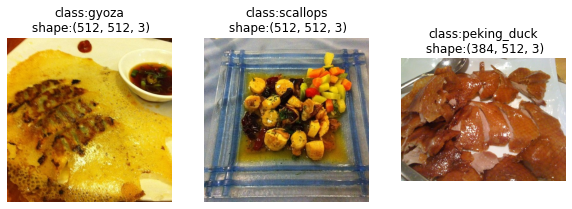

In [5]:
plt.figure(figsize=(10,10))
for i in range(1,4):
    plt.subplot(1,3,i)
    plot_random_image(class_list, test_dir)

## What is a Neural Network and how does it work?

## Building a CNN from Scratch

#### Importing data from directory

In [20]:
# importing our data
train_dir = './Food-Vision-REDO/datasets/all_data_set/train/'
test_dir = './Food-Vision-REDO/datasets/all_data_set/test/'

#### Generating a base model

In [40]:
# normalize the rgb values to 0-1
train_10_percent_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

# creating mini batches of categorical data and reshaping them into 224,224
train_data = train_10_percent_datagen.flow_from_directory(
    train_dir,
    batch_size=32,
    class_mode='categorical',
    target_size=(224,224) 
)

test_data = test_datagen.flow_from_directory(
    test_dir, 
    batch_size=32,
    class_mode='categorical',
    target_size=(224,224)
)

# building our base model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(10, 3, activation='relu', input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3, activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10,3, activation='relu'),
    tf.keras.layers.Conv2D(10,3, activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax')
])

# compiling
model_1.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

# fitting and saving its history
model_1_history = model_1.fit(
    train_data,
    epochs=5,
    steps_per_epoch=len(train_data),
    validation_data=test_data,
    validation_steps=len(test_data),
    #callbacks=[]
)

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.
Epoch 1/5
235/235 [==============================] - 18s 74ms/step - loss: 2.0721 - accuracy: 0.2445 - val_loss: 1.9590 - val_accuracy: 0.3016
Epoch 2/5
235/235 [==============================] - 17s 72ms/step - loss: 1.7743 - accuracy: 0.3845 - val_loss: 1.8729 - val_accuracy: 0.3368
Epoch 3/5
235/235 [==============================] - 17s 73ms/step - loss: 1.4541 - accuracy: 0.5052 - val_loss: 1.9324 - val_accuracy: 0.3436
Epoch 4/5
235/235 [==============================] - 17s 73ms/step - loss: 1.0628 - accuracy: 0.6475 - val_loss: 2.2700 - val_accuracy: 0.3088
Epoch 5/5
235/235 [==============================] - 17s 72ms/step - loss: 0.6433 - accuracy: 0.7932 - val_loss: 2.6802 - val_accuracy: 0.3024


In [41]:
model_1.evaluate(test_data)

79/79 [==============================] - 4s 54ms/step - loss: 2.6802 - accuracy: 0.3024


[2.6801910400390625, 0.30239999294281006]

In [42]:
model_1.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 53, 53, 10)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 28090)            

In [43]:
def plot_history_curves(model):
    loss = model.history['loss']
    val_loss = model.history['val_loss']
    
    accuracy = model.history['accuracy']
    val_accuracy = model.history['val_accuracy']
    
    epochs = range(len(model.history['loss']))
    
    plt.plot(epochs, loss, label='Training Loss')
    plt.plot(epochs, val_loss, label='Val Loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()
    
    plt.figure()
    plt.plot(epochs, accuracy, label='Training Accuracy')
    plt.plot(epochs, val_accuracy, label='Val Accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend()

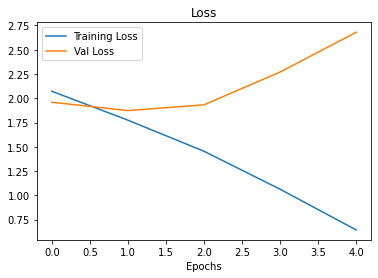

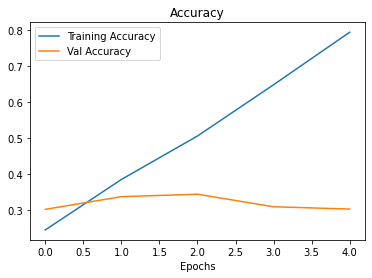

In [44]:
plot_history_curves(model_1_history)

### Overcoming Overfitting

Based from the graph above we can say our model is overfitting

Overfitting generally happens when our model **IS** learning on the training set, but doesn't really perform well with the validation set as seen in the graphs.

How to overcome overfitting: 

* **Get more data** - Get more data, having more data == more patterns to learn from. (we already have a wide variety of images)
* **Simplify model** - Overfitting would simply mean LITERALLY DOING PERFECTLY in the training set that its using those features(MEMORIZED it) instead of learning and actually applying what it's learned in the test/validation
* **Use Data Augmentation** - Generating different patterns of the image so the model would take a hard time learning as it adds different varieties of patterns to learn from. 
* **Use Transfer Learning** - By utilizing models that have already and been pretrained and use those patterns for our own problems

#### Simplifying the data

In [45]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(10, 3, activation='relu', input_shape=(224,224,3)),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_2.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

model_2_history = model_2.fit(
    train_data,
    epochs=5,
    steps_per_epoch=len(train_data),
    validation_data=test_data,
    validation_steps=len(test_data)
)

Epoch 1/5
235/235 [==============================] - 18s 76ms/step - loss: 2.0969 - accuracy: 0.2379 - val_loss: 1.9776 - val_accuracy: 0.2892
Epoch 2/5
235/235 [==============================] - 18s 76ms/step - loss: 1.6698 - accuracy: 0.4375 - val_loss: 2.0061 - val_accuracy: 0.3100
Epoch 3/5
235/235 [==============================] - 18s 78ms/step - loss: 1.1659 - accuracy: 0.6275 - val_loss: 2.1954 - val_accuracy: 0.2948
Epoch 4/5
235/235 [==============================] - 18s 78ms/step - loss: 0.6855 - accuracy: 0.7937 - val_loss: 2.6769 - val_accuracy: 0.2792
Epoch 5/5
235/235 [==============================] - 18s 75ms/step - loss: 0.3417 - accuracy: 0.9104 - val_loss: 3.2524 - val_accuracy: 0.2784


In [46]:
model_2.evaluate(test_data)

79/79 [==============================] - 4s 56ms/step - loss: 3.2524 - accuracy: 0.2784


[3.2523508071899414, 0.2784000039100647]

In [47]:
model_2.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 222, 222, 10)      280       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 111, 111, 10)      0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 109, 109, 10)      910       
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 54, 54, 10)        0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 29160)             0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)                291610    
Total params: 292,800
Trainable params: 292,800
Non-trainable params: 0
________________________________________________

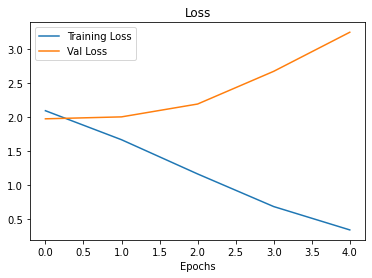

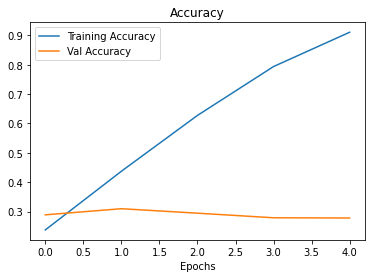

In [48]:
plot_history_curves(model_2_history)

Generally better than our base model.

#### Data Augmentation

## Building a CNN with help of Transfer Learning

## Scaling Up our CNN Model